In [2]:
import csv
import os
import random
import sys
import numpy as np
import ROOT as r
r.gROOT.ProcessLine(".include /Users/isaac/Work/MG5_aMC_v3_1_0")
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/ExRootAnalysis/\
ExRootAnalysis/ExRootTreeReader.h"'
)
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/\
ExRootAnalysis/ExRootAnalysis/ExRootClasses.h"'
)
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/ExRootAnalysis/\
ExRootAnalysis/ExRootLHEFReader.h"'
)
r.gSystem.Load(
    "/Users/isaac/Work/MG5_aMC_v3_1_0/\
ExRootAnalysis/libExRootAnalysis.so"
)
os.environ["TERM"] = "linux"
random.seed(1)

Welcome to JupyROOT 6.22/09


In [3]:
mass_list = [2, 20, 200]
coupling = 1.0e-04
event_path = "/Users/isaac/Work/MUonE/MG5_events/check_iftah/Events/"

total_gamma_list = []
total_E_list = []
for mass in mass_list:
    chain = r.TChain("LHEF")
    chain.Reset()
    E_list = []
    root_file_subfolder = "X_" + str(mass) + "mev"
    root_file_name = "unweighted_events.root"
    root_file_path = os.path.join(event_path, root_file_subfolder, root_file_name)
    chain.Add(root_file_path)
    gamma_file_path = "./" + str(mass) + "gamma.csv"
    beta_file_path = "./" + str(mass) + "beta.csv"
    gamma_list = []
    for event in chain:
        for particle in event.Particle:
            if particle.PID == 103:
                E_X = particle.E
                gamma = E_X/mass
        gamma_list.append(gamma)
        E_list.append(E_X)
    total_E_list.append(E_list)
    total_gamma_list.append(gamma_list)

(array([2196.,  883.,  435.,  308.,  301.,  260.,  293.,  350.,  376.,
         420.,  441.,  454.,  466.,  484.,  510.,  477.,  450.,  429.,
         316.,  151.]),
 array([145.10882511, 184.82991604, 224.55100698, 264.27209791,
        303.99318884, 343.71427977, 383.43537071, 423.15646164,
        462.87755257, 502.59864351, 542.31973444, 582.04082537,
        621.7619163 , 661.48300724, 701.20409817, 740.9251891 ,
        780.64628004, 820.36737097, 860.0884619 , 899.80955283,
        939.53064377]),
 <BarContainer object of 20 artists>)

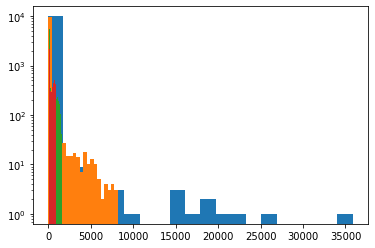

In [15]:
from matplotlib import pyplot as plt
plt.yscale('log')
plt.hist(total_gamma_list[0],bins=20)
plt.hist(total_gamma_list[1],bins=20)
plt.hist(total_gamma_list[2],bins=20)
plt.hist(total_gamma_list[3],bins=20)
